In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import kmax as kx
import utility as util
from hierarchy import *
from IPython.core.debugger import set_trace

# Finding Tree Path Covers

### TODO
[ ] Fix path recovery bug (see Test Tree 2)

    [ ] check why 5->23 isn't being added

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:blue")
    
    if draw_path:
        path_cover,_,_=util.path_cover(tree)
        #print(path_cover)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Test Tree 3

In [3]:
test_tree3 = nx.read_graphml('test3.graphml', node_type=int)
layout3 = hierarchye_pos(test_tree3, 0)

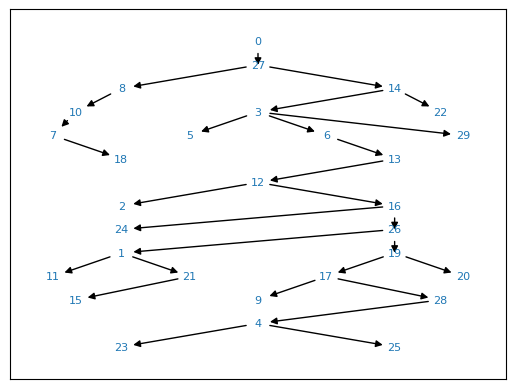

In [4]:
draw_tree(test_tree3, layout3, draw_path=False)

ERROR: Undercounting!
-1.0347377089254959
> c:\users\jgodu\desktop\mean-field last-passage percolation\meanfieldlastpassagepercolation\utility.py(139)path_cover()
    137     set_trace()
    138 
--> 139     return path, diff, max_weights[root][0]
    140 
    141 def path_cover_two(tree):



ipdb>  c


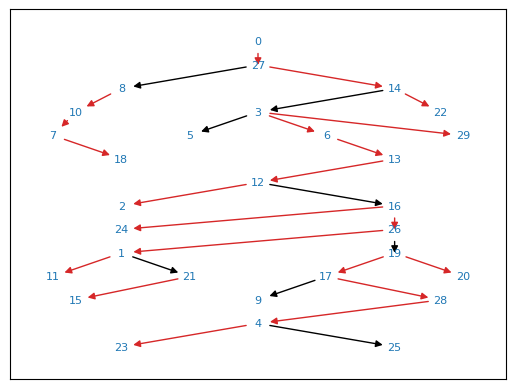

In [6]:
draw_tree(test_tree3, layout3)

ERROR: Undercounting!
-1.0347377089254959
> c:\users\jgodu\desktop\mean-field last-passage percolation\meanfieldlastpassagepercolation\utility.py(139)path_cover()
    137     set_trace()
    138 
--> 139     return path, diff, max_weights[root][0]
    140 
    141 def path_cover_two(tree):



ipdb>  max_weights[13]


(6.06298894902342, 0.914670584903633, 12, None)


ipdb>  max_weights[12]


(6.06298894902342, -0.04003222008968221, 2, 16)


ipdb>  max_weights[16]


(5.767056784336057, 0.12339078428194239, 24, 26)


ipdb>  max_weights[26]


(5.5873668912117465, -0.36033323101444303, 1, 19)


ipdb>  max_weights[19]


(2.52230211752055, 0.5697704999143449, 20, 17)


ipdb>  max_weights[17]


(2.0642198924616038, -0.634372257821371, 28, 9)


ipdb>  max_weights[9]


(0, 0.638813758558676, None, None)


ipdb>  sum(max_weights[i][1] for i in [12,16,19,17,9])


*** NameError: name 'max_weights' is not defined


ipdb>  max_weights


{22: (0, 0.2891113658521579, None, None), 5: (0, 0.149632441258842, None, None), 29: (0, 0.7862031179844229, None, None), 18: (0, 0.2779256718483918, None, None), 2: (0, 0.17254138040542077, None, None), 24: (0, 0.17968989312431005, None, None), 11: (0, 0.9685825632890964, None, None), 20: (0, 0.45808222505894625, None, None), 15: (0, 0.7469954233138083, None, None), 9: (0, 0.638813758558676, None, None), 23: (0, 0.13821142682840826, None, None), 25: (0, 0.10651804757848571, None, None), 4: (0.24472947440689397, 0.43060267301003197, 23, 25), 28: (0.6753321474169259, 0.7500739864860018, 4, None), 17: (2.0642198924616038, -0.634372257821371, 28, 9), 21: (0.7469954233138083, 0.08541936784147719, 15, None), 19: (2.52230211752055, 0.5697704999143449, 20, 17), 1: (1.800997354444382, 0.6942969193324703, 11, 21), 26: (5.5873668912117465, -0.36033323101444303, 1, 19), 16: (5.767056784336057, 0.12339078428194239, 24, 26), 12: (6.06298894902342, -0.04003222008968221, 2, 16), 13: (6.06298894902342

ipdb>  sum([max_weights[i][1] for i in [12,16,19,17,9]])


0.6575705648439101


ipdb>  sum([max_weights[i][1] for i in [12,16,26,19,17,9]])


0.29723733382946704


ipdb>  sum([max_weights[i][1] for i in [12,16,26,19,17,9]])+max_weights[13][1]


1.2119079187330999


ipdb>  c


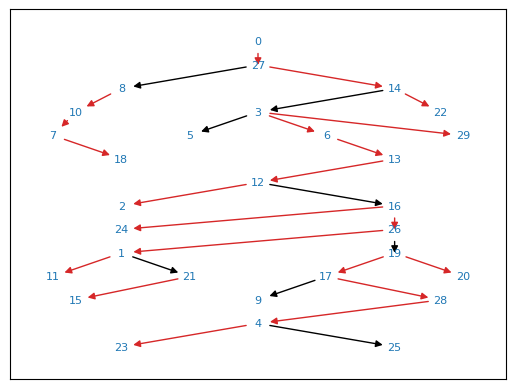

In [8]:
draw_tree(test_tree3, layout3)

### Test Tree 2

In [9]:
test_tree2 = nx.read_graphml('test2.graphml', node_type=int)

> c:\users\jgodu\desktop\mean-field last-passage percolation\meanfieldlastpassagepercolation\utility.py(139)path_cover()
    137     #set_trace()
    138 
--> 139     return path, diff, max_weights[root][0]
    140 
    141 def path_cover_two(tree):



ipdb>  c


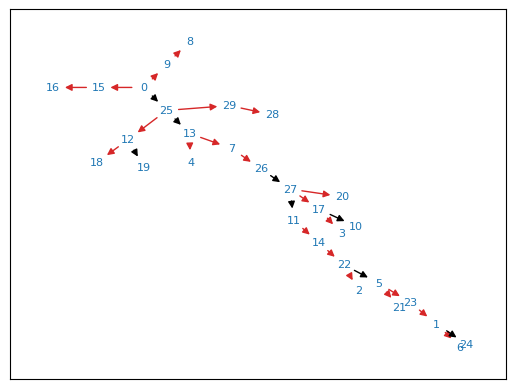

In [12]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

In [9]:
weights = nx.get_edge_attributes(test_tree2, 'weight')
weights

{(0, 9): 0.6713299642248209,
 (0, 15): 0.6780263397318991,
 (0, 25): 0.05007476597809102,
 (1, 6): 0.651040256900006,
 (1, 24): 0.2026817067165918,
 (1, 23): 0.2203683735684262,
 (2, 22): 0.7950465128663298,
 (3, 17): 0.274021136671734,
 (4, 13): 0.9323397992625789,
 (5, 21): 0.447258638081242,
 (5, 23): 0.05823788413584208,
 (5, 22): 0.5981424834526826,
 (7, 26): 0.14726814304604874,
 (7, 13): 0.516216852859772,
 (8, 9): 0.3004731180411211,
 (10, 17): 0.05006552196965741,
 (11, 14): 0.5773834209572368,
 (11, 27): 0.1944862303788728,
 (12, 18): 0.42572743115541245,
 (12, 19): 0.293873147609109,
 (12, 25): 0.29841148707596465,
 (13, 25): 0.31045728275902607,
 (14, 22): 0.7498033868978159,
 (15, 16): 0.9042411991169952,
 (17, 27): 0.45255385055525676,
 (20, 27): 0.8801762164504786,
 (25, 29): 0.0416855233576604,
 (26, 27): 0.10267131885221203,
 (28, 29): 0.8007522302265757}

In [10]:
path = {(22, 2), (25, 29), (23, 1), (7, 26), (26, 27), (17, 3), (9, 8), (14, 22), (1, 6), (11, 14), (29, 28), (12, 18), (5, 21), (13, 4), (13, 7), (25, 12), (15, 16), (17, 10), (27, 20), (0, 9), (5, 23), (0, 15)}
total_weight = 0
for u,v in path:
    try:
        total_weight += weights[(u,v)]
    except KeyError:
        total_weight += weights[(v,u)]
print(total_weight)

10.52254475544983


### Test Tree 1

In [14]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

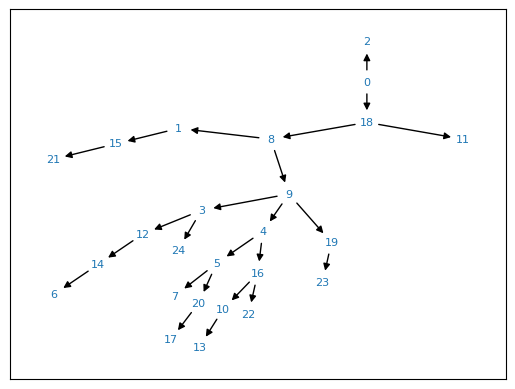

In [15]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

> c:\users\jgodu\desktop\mean-field last-passage percolation\meanfieldlastpassagepercolation\utility.py(139)path_cover()
    137     #set_trace()
    138 
--> 139     return path, diff, max_weights[root][0]
    140 
    141 def path_cover_two(tree):



ipdb>  c


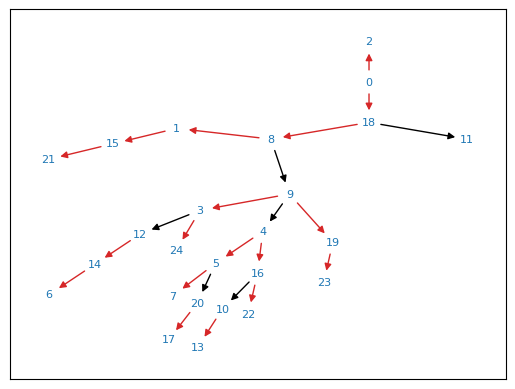

In [16]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [14]:
nx.get_edge_attributes(test_tree, 'weight')

{(0, 2): 0.7977562074230161,
 (0, 18): 0.9843369496798171,
 (1, 15): 0.8568272928308645,
 (1, 8): 0.8381008122574674,
 (3, 12): 0.3243095919924279,
 (3, 9): 0.8151146947555405,
 (3, 24): 0.3818896029104081,
 (4, 5): 0.609678983703168,
 (4, 16): 0.6773260190983791,
 (4, 9): 0.3298688136129869,
 (5, 7): 0.5737376856525619,
 (5, 20): 0.025730461564338558,
 (6, 14): 0.9769508317917671,
 (8, 18): 0.12603851472739536,
 (8, 9): 0.26527651714632816,
 (9, 19): 0.8477207562304858,
 (10, 13): 0.6643525896073521,
 (10, 16): 0.4600428895195655,
 (11, 18): 0.09186949084978413,
 (12, 14): 0.35025825589119564,
 (15, 21): 0.8864538053441008,
 (16, 22): 0.48411238821975877,
 (17, 20): 0.044350567376415406,
 (19, 23): 0.2067345124482346}

### Unit edge weights

In [15]:
n = 30
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

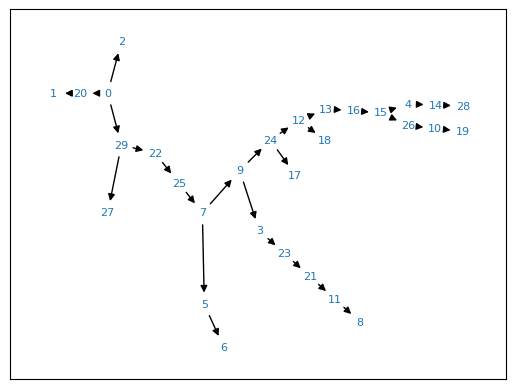

In [16]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

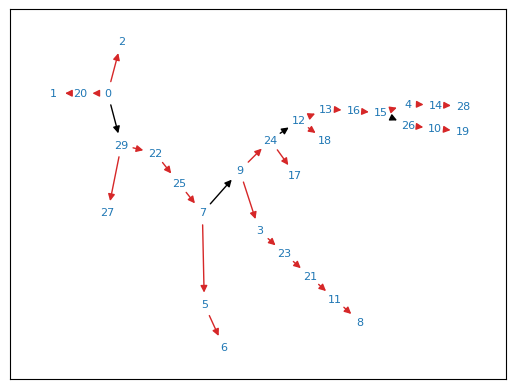

In [17]:
draw_tree(ones_tree, ones_layout)

In [18]:
util.path_cover_two(ones_tree)

{2: 0,
 1: 0,
 27: 0,
 6: 0,
 17: 0,
 18: 0,
 8: 0,
 19: 0,
 28: 0,
 14: 1,
 10: 1,
 4: 2,
 26: 2,
 15: 6,
 16: 6,
 11: 1,
 13: 7,
 21: 2,
 12: 9,
 23: 3,
 24: 10,
 3: 4,
 9: 16,
 5: 1,
 7: 18,
 25: 19,
 22: 20,
 29: 22,
 20: 1,
 0: 25}

### Random tree with edge weights in (0,1)

In [19]:
n = 30
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

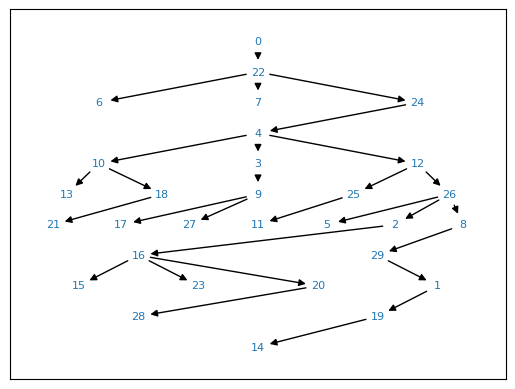

In [20]:
layout = hierarchye_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

Undercounting!
-0.49625817403630634


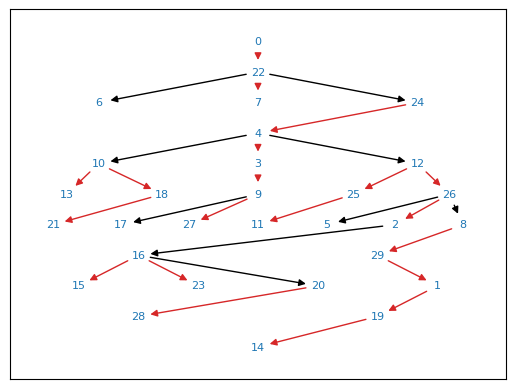

In [21]:
draw_tree(tree, layout)

In [22]:
nx.get_edge_attributes(tree, 'weight')

{(0, 22): 0.29809363526670274,
 (1, 19): 0.021675827180817286,
 (1, 29): 0.5397040280837966,
 (2, 16): 0.10794819367481767,
 (2, 26): 0.7569550695329643,
 (3, 9): 0.9630521044951854,
 (3, 4): 0.8386321215465425,
 (4, 10): 0.5678252577100503,
 (4, 24): 0.4932210142390433,
 (4, 12): 0.7838338010791196,
 (5, 26): 0.41144599523563097,
 (6, 22): 0.7943518093030074,
 (7, 22): 0.8680365309406695,
 (8, 26): 0.22691488698438256,
 (8, 29): 0.1256498398025474,
 (9, 17): 0.31393110223574605,
 (9, 27): 0.8506293860308479,
 (10, 13): 0.22235654744808186,
 (10, 18): 0.5525834573066131,
 (11, 25): 0.43055558056757615,
 (12, 25): 0.867132274869968,
 (12, 26): 0.8720649731187812,
 (14, 19): 0.3901733865130277,
 (15, 16): 0.5746040822888934,
 (16, 23): 0.9955898416119562,
 (16, 20): 0.39446544401695893,
 (18, 21): 0.2288560189845753,
 (20, 28): 0.9675612151419362,
 (22, 24): 0.10811644113087449}

### Bulk Testing with (0,1)-weights

In [23]:
failure_count = 0
bad_trees = []
for i in range(1000):
    n = 100
    T = nx.random_labeled_tree(n)
    
    for s,t in T.edges():
        T[s][t]['weight'] = random.random()

    path, diff, x_root = util.path_cover(T)
    if not math.isclose(diff, 0.0, rel_tol=1e-4):
        failure_count += 1
        bad_trees.append(T)

Undercounting!
-0.9919986372912035
Undercounting!
-1.7359984642713968
Undercounting!
-0.5174397130413553
Undercounting!
-0.6028531088782216
Undercounting!
-0.4743912209605057
Undercounting!
-0.3354699015308782
Undercounting!
-0.34100480266882727
Undercounting!
-0.16772947047035558
Undercounting!
-0.5344760435190992
Undercounting!
-1.0272539908769573
Undercounting!
-0.31027774089238846
Undercounting!
-0.6222056018324906
Undercounting!
-1.4222285378367232
Undercounting!
-0.09205403837750481
Undercounting!
-0.31242603361619814
Undercounting!
-0.8015820650207601
Undercounting!
-0.3043299941510469
Undercounting!
-0.13422101006408838
Undercounting!
-1.10525029481623
Undercounting!
-0.0030315996436698356
Undercounting!
-1.0623029346223163
Undercounting!
-0.24851053218527852
Undercounting!
-0.13885762251668865
Undercounting!
-0.5025553430141017
Undercounting!
-0.9203758123512955
Undercounting!
-0.5602030131030205
Undercounting!
-0.913442239572035
Undercounting!
-0.8981058741162329
Undercountin

failures: 928


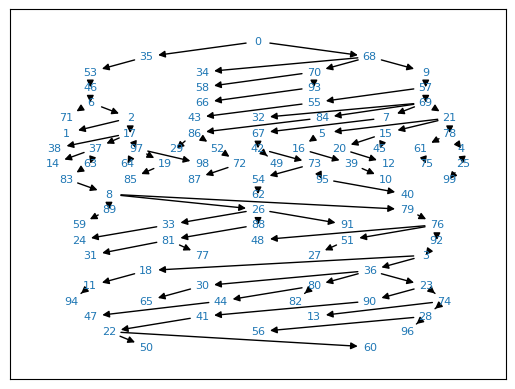

In [24]:
print(f'failures: {failure_count}')
bad_tree = bad_trees[0]
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0), draw_path=False)

Undercounting!
-0.9919986372912035


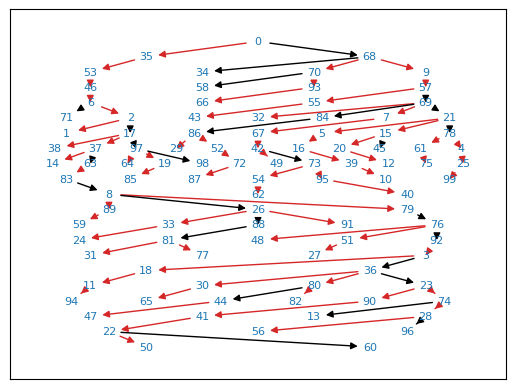

In [25]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [26]:
util.path_cover(bad_tree)

Undercounting!
-0.9919986372912035


({(0, 35),
  (2, 1),
  (3, 18),
  (4, 25),
  (5, 16),
  (6, 2),
  (7, 67),
  (8, 79),
  (8, 89),
  (9, 57),
  (11, 94),
  (15, 20),
  (16, 39),
  (17, 37),
  (17, 38),
  (18, 11),
  (19, 85),
  (20, 12),
  (21, 5),
  (21, 15),
  (22, 50),
  (23, 74),
  (23, 90),
  (25, 99),
  (26, 33),
  (26, 91),
  (28, 56),
  (30, 65),
  (33, 24),
  (35, 53),
  (36, 30),
  (36, 80),
  (37, 14),
  (39, 10),
  (41, 22),
  (42, 49),
  (44, 47),
  (46, 6),
  (51, 27),
  (52, 72),
  (53, 46),
  (54, 62),
  (55, 43),
  (57, 55),
  (61, 75),
  (63, 83),
  (67, 42),
  (68, 9),
  (68, 70),
  (69, 7),
  (69, 32),
  (70, 93),
  (72, 87),
  (73, 54),
  (73, 95),
  (74, 28),
  (76, 48),
  (76, 51),
  (78, 4),
  (78, 61),
  (80, 82),
  (81, 31),
  (81, 77),
  (86, 29),
  (86, 52),
  (89, 59),
  (90, 41),
  (92, 3),
  (93, 66),
  (95, 40),
  (97, 19),
  (97, 64)},
 -0.9919986372912035,
 42.17933119276615)

In [27]:
math.isclose(util.path_cover(bad_tree)[1],0.0,rel_tol=1e-4)

Undercounting!
-0.9919986372912035


False